# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

,Site #,WGS84 N,WGS 84 E,Origin,Origin_ID,Dominant_specias,Species_ID,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,51.435741,30.107979,n,0,Birch,2,920,6.824,10300,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,51.434093,30.108523,a,1,Pine,0,3600,8.189,15100,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,51.434163,30.109196,a,1,Pine,0,4360,8.380,14600,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,51.434217,30.110484,a,1,Pine,0,3420,8.137,12700,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,51.434056,30.111980,a,1,Pine,0,2200,7.696,12100,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'ln_Tag_Cs', 'ln_Tag_Sr',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                    'mf_chm_MIN', 'r_MIN', 'contr_b_MAX', 'contr_b_STD'])

# Show the first five columns
select.head()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,mf_chm_MIN,r_MIN,contr_b_MAX,contr_b_STD
0,6.824,9.240,1912,784,-0.73,2.58,2.33,0.445070,13,2713.600586,332.963753
1,8.189,9.622,2005,818,0.59,2.92,2.47,12.465903,24,1793.493042,293.868420
2,8.380,9.589,2001,818,0.78,2.88,2.44,13.028298,18,1761.097900,272.526176
3,8.137,9.449,2040,833,0.52,2.72,2.55,2.128231,15,2518.435303,299.595643
4,7.696,9.401,1758,717,0.22,2.83,2.14,12.171553,8,2525.819336,327.599176


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   mf_chm_MIN     103 non-null    float64
 8   r_MIN          103 non-null    int64  
 9   contr_b_MAX    103 non-null    float64
 10  contr_b_STD    103 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 9.0 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()

/tmp/ipykernel_25547/725619848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()


Cs_wood_Bq/kg                                                \
                         count          mean          std      min       25%   
Dominant_specias                                                               
Alder                      4.0   3353.250000  4978.217444    360.0    864.75   
Aspen                      1.0  86400.000000          NaN  86400.0  86400.00   
Birch                     23.0   4489.043478  7412.075967     93.0    565.00   
Oak                        3.0   2550.000000  2248.088077    420.0   1375.00   
Pine                      71.0   3452.535211  7193.888267     34.0    590.00   
Spruce                     1.0    177.000000          NaN    177.0    177.00   

                                            Sr_wood_Bq/kg                \
                      50%      75%      max         count          mean   
Dominant_specias                                                          
Alder              1126.5   3615.0  10800.0           4.0   1534.000000   
Aspen             86400.0  86400.0  86400.0           1.0  65500.000000   
Birch              1360.0   3079.5  30700.0          23.0  67957.695652   
Oak                2330.0   3615.0   4900.0           3.0   2143.333333   
Pine               1040.0   2200.0  35200.0          71.0  15541.450704   
Spruce              177.0    177.0    177.0           1.0   2400.000000   

                                                                                
                            std      min      25%      50%      75%        max  
Dominant_specias                                                                
Alder                734.881396    526.0   1219.0   1755.0   2070.0     2100.0  
Aspen                       NaN  65500.0  65500.0  65500.0  65500.0    65500.0  
Birch             217382.739246   1260.0   4450.0   8030.0  20784.0  1050000.0  
Oak                 1338.220211    710.0   1535.0   2360.0   2860.0     3360.0  
Pine               41295.160700    435.0   2090.0   4780.0  11750.0   323600.0  
Spruce                      NaN   2400.0   2400.0   2400.0   2400.0     2400.0

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,mf_chm_MIN,r_MIN,contr_b_MAX,contr_b_STD
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.04933,8.656485,3014.359223,1136.436893,-0.251845,2.464854,3.570291,3.368496,11.378641,2712.352866,349.854034
std,1.64946,1.472424,4988.505540,2019.773384,1.104536,0.904757,6.089170,4.845054,9.139568,864.116297,93.673105
min,3.52600,6.075000,423.000000,98.000000,-3.030000,0.390000,0.480000,-0.018586,2.000000,832.155518,109.232976
25%,6.31900,7.664000,635.500000,199.500000,-0.725000,1.805000,0.710000,0.482279,5.000000,2123.614868,292.544440
50%,6.95700,8.472000,1145.000000,362.000000,-0.020000,2.600000,1.290000,0.642883,8.000000,2601.248047,341.904211
75%,7.91350,9.421000,2423.500000,966.000000,0.520000,3.160000,2.960000,3.921804,15.000000,3045.944336,427.359073
max,11.36700,13.864000,25173.000000,10477.000000,1.650000,4.660000,36.590000,17.862923,56.000000,6252.923340,588.661708


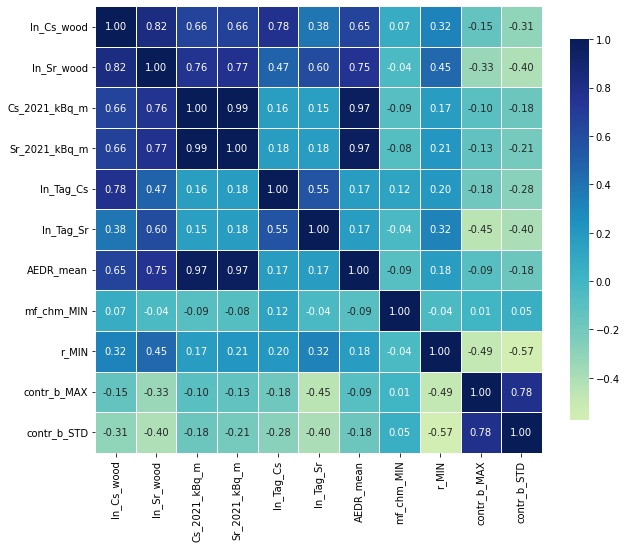

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['mf_chm_MIN', 'r_MIN', 'contr_b_MAX', 'contr_b_STD'])
y = pd.DataFrame(select, columns= ['ln_Tag_Sr'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [10]:
# Columns in "X" data collections
X.head()

,mf_chm_MIN,r_MIN,contr_b_MAX,contr_b_STD
0,0.445070,13,2713.600586,332.963753
1,12.465903,24,1793.493042,293.868420
2,13.028298,18,1761.097900,272.526176
3,2.128231,15,2518.435303,299.595643
4,12.171553,8,2525.819336,327.599176


In [11]:
# Columns in "y" data collections
y.head()

,ln_Tag_Sr
0,2.58
1,2.92
2,2.88
3,2.72
4,2.83


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.12280809437953122, 0.2711581551128137, -0.5266411513039297]
    Mean: -0.044
    Std: 0.346

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.86850945 0.64850745 0.92458401]
    Mean: 0.814
    Std: 0.119

 --------------------
Mean absolute error (MAE): 

    Scores: [0.7023042547362192, 0.6778942535204044, 0.5847487428609064]
    Mean: 0.655
    Std: 0.051

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=30, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Model with rank: 1
Mean validation score: 0.096 (std: 0.157)
Parameters: {'colsample_bytree': 0.13705095371167786, 'gamma': 0.05535713606198478, 'learning_rate': 0.047655305777738514, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6983671185395617}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.21205306, 0.42649384, 0.16458807, 0.37756925, 0.65105996,
       0.43219495, 0.30860705, 0.39868937, 0.23617015, 0.2804337 ,
       0.25793376, 0.46939745, 0.15397358, 0.20667553, 0.43392415,
       0.1291769 , 0.46707754, 0.30620723, 0.20656595, 0.27744441,
       0.4465035 , 0.33245263, 0.17312646, 0.26380668, 0.17129045,
       0.29757996, 0.18802619, 0.2841629 , 0.37581425, 0.25243492]), 'std_fit_time': array([0.04937789, 0.03554268, 0.01299077, 0.00448837, 0.44741772,
       0.00957301, 0.02900186, 0.01363615, 0.00484195, 0.00575135,
       0.00396868, 0.00539951, 0.03958674, 0.01145529, 0.00525442,
       0.00046319, 0.00531941, 0.0152782 , 0.00369239, 0.03413384,
       0.01811991, 0.00865294, 0.00328341, 0.00327074, 0.00729244,
       0.01100711, 0.0297352 , 0.01800794, 0.01246499, 0.00193404]), 'mean_score_time': array([0.00605454, 0.006006  , 0.00616746, 0.0063508 , 0.00598583,
       0.00602374, 0.00607305, 0.00595999, 0.00629048, 0.00618105,
     

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.13705095371167786
Gamma: 0.05535713606198478
Learning_rate: 0.047655305777738514
Max_depth: 3
N_estimators: 50
Subsample: 0.6983671185395617


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(30):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:2.03025	validation_1-rmse:2.24687
[1]	validation_0-rmse:1.95011	validation_1-rmse:2.16017
[2]	validation_0-rmse:1.87371	validation_1-rmse:2.08422


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.80081	validation_1-rmse:2.00973
[4]	validation_0-rmse:1.73314	validation_1-rmse:1.94445
[5]	validation_0-rmse:1.66487	validation_1-rmse:1.89018
[6]	validation_0-rmse:1.60222	validation_1-rmse:1.82669
[7]	validation_0-rmse:1.54315	validation_1-rmse:1.77420
[8]	validation_0-rmse:1.48615	validation_1-rmse:1.71896
[9]	validation_0-rmse:1.43201	validation_1-rmse:1.66438
[10]	validation_0-rmse:1.37943	validation_1-rmse:1.61241
[11]	validation_0-rmse:1.33262	validation_1-rmse:1.56496
[12]	validation_0-rmse:1.28869	validation_1-rmse:1.52230
[13]	validation_0-rmse:1.24476	validation_1-rmse:1.47265
[14]	validation_0-rmse:1.20431	validation_1-rmse:1.44080
[15]	validation_0-rmse:1.16653	validation_1-rmse:1.39932
[16]	validation_0-rmse:1.12955	validation_1-rmse:1.36431
[17]	validation_0-rmse:1.09384	validation_1-rmse:1.33487
[18]	validation_0-rmse:1.06136	validation_1-rmse:1.30471
[19]	validation_0-rmse:1.02975	validation_1-rmse:1.27188
[20]	validation_0-rmse:1.00289	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:2.03598	validation_1-rmse:1.79710
[2]	validation_0-rmse:1.95645	validation_1-rmse:1.72162
[3]	validation_0-rmse:1.87905	validation_1-rmse:1.65245
[4]	validation_0-rmse:1.80357	validation_1-rmse:1.57699
[5]	validation_0-rmse:1.73398	validation_1-rmse:1.52240
[6]	validation_0-rmse:1.66879	validation_1-rmse:1.47075
[7]	validation_0-rmse:1.60945	validation_1-rmse:1.42268
[8]	validation_0-rmse:1.54747	validation_1-rmse:1.36569
[9]	validation_0-rmse:1.49221	validation_1-rmse:1.31951
[10]	validation_0-rmse:1.44000	validation_1-rmse:1.27461
[11]	validation_0-rmse:1.38914	validation_1-rmse:1.23312
[12]	validation_0-rmse:1.33517	validation_1-rmse:1.19105
[13]	validation_0-rmse:1.28789	validation_1-rmse:1.15634
[14]	validation_0-rmse:1.24650	validation_1-rmse:1.13071
[15]	validation_0-rmse:1.20338	validation_1-rmse:1.09631
[16]	validation_0-rmse:1.16711	validation_1-rmse:1.06648
[17]	validation_0-rmse:1.12836	validation_1-rmse:1.03733
[18]	validation_0-rmse:1.09651	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.88401	validation_1-rmse:2.04891
[3]	validation_0-rmse:1.80925	validation_1-rmse:1.97038
[4]	validation_0-rmse:1.74235	validation_1-rmse:1.89963
[5]	validation_0-rmse:1.67783	validation_1-rmse:1.83550
[6]	validation_0-rmse:1.61475	validation_1-rmse:1.77588
[7]	validation_0-rmse:1.55786	validation_1-rmse:1.71814
[8]	validation_0-rmse:1.50298	validation_1-rmse:1.66253
[9]	validation_0-rmse:1.45403	validation_1-rmse:1.61324
[10]	validation_0-rmse:1.40457	validation_1-rmse:1.56110
[11]	validation_0-rmse:1.35625	validation_1-rmse:1.51344
[12]	validation_0-rmse:1.30909	validation_1-rmse:1.46300
[13]	validation_0-rmse:1.26696	validation_1-rmse:1.41862
[14]	validation_0-rmse:1.22915	validation_1-rmse:1.37653
[15]	validation_0-rmse:1.18921	validation_1-rmse:1.33180
[16]	validation_0-rmse:1.15722	validation_1-rmse:1.30151
[17]	validation_0-rmse:1.12175	validation_1-rmse:1.26586
[18]	validation_0-rmse:1.09109	validation_1-rmse:1.23559
[19]	validation_0-rmse:1.05941	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.76198	validation_1-rmse:1.81793
[5]	validation_0-rmse:1.69543	validation_1-rmse:1.75785
[6]	validation_0-rmse:1.62907	validation_1-rmse:1.69811
[7]	validation_0-rmse:1.57074	validation_1-rmse:1.64549
[8]	validation_0-rmse:1.51178	validation_1-rmse:1.59371
[9]	validation_0-rmse:1.45782	validation_1-rmse:1.54675
[10]	validation_0-rmse:1.40779	validation_1-rmse:1.51131
[11]	validation_0-rmse:1.36017	validation_1-rmse:1.47602
[12]	validation_0-rmse:1.31480	validation_1-rmse:1.44367
[13]	validation_0-rmse:1.27076	validation_1-rmse:1.41249
[14]	validation_0-rmse:1.22626	validation_1-rmse:1.38234
[15]	validation_0-rmse:1.18429	validation_1-rmse:1.35410
[16]	validation_0-rmse:1.14252	validation_1-rmse:1.32049
[17]	validation_0-rmse:1.10788	validation_1-rmse:1.29398
[18]	validation_0-rmse:1.07492	validation_1-rmse:1.27300
[19]	validation_0-rmse:1.04227	validation_1-rmse:1.25081
[20]	validation_0-rmse:1.01075	validation_1-rmse:1.22748
[21]	validation_0-rmse:0.97907	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.98014	validation_1-rmse:1.17386
[21]	validation_0-rmse:0.95296	validation_1-rmse:1.15628
[22]	validation_0-rmse:0.92285	validation_1-rmse:1.13864
[23]	validation_0-rmse:0.89351	validation_1-rmse:1.11761
[24]	validation_0-rmse:0.87021	validation_1-rmse:1.10334
[25]	validation_0-rmse:0.84629	validation_1-rmse:1.08694
[26]	validation_0-rmse:0.82555	validation_1-rmse:1.07441
[27]	validation_0-rmse:0.80503	validation_1-rmse:1.05970
[28]	validation_0-rmse:0.78709	validation_1-rmse:1.05191
[29]	validation_0-rmse:0.77100	validation_1-rmse:1.04156
[30]	validation_0-rmse:0.75847	validation_1-rmse:1.03313
[31]	validation_0-rmse:0.74248	validation_1-rmse:1.02741
[32]	validation_0-rmse:0.72643	validation_1-rmse:1.02053
[33]	validation_0-rmse:0.71042	validation_1-rmse:1.01410
[34]	validation_0-rmse:0.69850	validation_1-rmse:1.00985
[35]	validation_0-rmse:0.68364	validation_1-rmse:1.00119
[36]	validation_0-rmse:0.67255	validation_1-rmse:0.99554
[37]	validation_0-rmse:0.65947	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.25959	validation_1-rmse:1.14110
[15]	validation_0-rmse:1.22254	validation_1-rmse:1.10180
[16]	validation_0-rmse:1.18554	validation_1-rmse:1.06647
[17]	validation_0-rmse:1.15375	validation_1-rmse:1.03909
[18]	validation_0-rmse:1.11956	validation_1-rmse:1.00611
[19]	validation_0-rmse:1.09079	validation_1-rmse:0.98162
[20]	validation_0-rmse:1.06049	validation_1-rmse:0.95256
[21]	validation_0-rmse:1.03272	validation_1-rmse:0.92783
[22]	validation_0-rmse:1.00571	validation_1-rmse:0.91081
[23]	validation_0-rmse:0.98234	validation_1-rmse:0.88935
[24]	validation_0-rmse:0.96034	validation_1-rmse:0.86858
[25]	validation_0-rmse:0.94014	validation_1-rmse:0.84943
[26]	validation_0-rmse:0.91779	validation_1-rmse:0.83012
[27]	validation_0-rmse:0.90117	validation_1-rmse:0.81527
[28]	validation_0-rmse:0.88365	validation_1-rmse:0.80090
[29]	validation_0-rmse:0.86663	validation_1-rmse:0.78704
[30]	validation_0-rmse:0.85131	validation_1-rmse:0.77629
[31]	validation_0-rmse:0.83363	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.02440	validation_1-rmse:1.12889
[21]	validation_0-rmse:1.00146	validation_1-rmse:1.10988
[22]	validation_0-rmse:0.97600	validation_1-rmse:1.07919
[23]	validation_0-rmse:0.94743	validation_1-rmse:1.05435
[24]	validation_0-rmse:0.92013	validation_1-rmse:1.03505
[25]	validation_0-rmse:0.89749	validation_1-rmse:1.01593
[26]	validation_0-rmse:0.87678	validation_1-rmse:1.00114
[27]	validation_0-rmse:0.85769	validation_1-rmse:0.98416
[28]	validation_0-rmse:0.83662	validation_1-rmse:0.97523
[29]	validation_0-rmse:0.82002	validation_1-rmse:0.96202
[30]	validation_0-rmse:0.80093	validation_1-rmse:0.95038
[31]	validation_0-rmse:0.78353	validation_1-rmse:0.94454
[32]	validation_0-rmse:0.76827	validation_1-rmse:0.94373
[33]	validation_0-rmse:0.75233	validation_1-rmse:0.93803
[34]	validation_0-rmse:0.74217	validation_1-rmse:0.93020
[35]	validation_0-rmse:0.73061	validation_1-rmse:0.92292
[36]	validation_0-rmse:0.71697	validation_1-rmse:0.92673
[37]	validation_0-rmse:0.70380	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.05362	validation_1-rmse:1.24144
[20]	validation_0-rmse:1.02349	validation_1-rmse:1.21269
[21]	validation_0-rmse:0.99492	validation_1-rmse:1.19871
[22]	validation_0-rmse:0.96861	validation_1-rmse:1.18714
[23]	validation_0-rmse:0.94368	validation_1-rmse:1.17227
[24]	validation_0-rmse:0.91936	validation_1-rmse:1.15416
[25]	validation_0-rmse:0.89818	validation_1-rmse:1.13529
[26]	validation_0-rmse:0.87893	validation_1-rmse:1.11627
[27]	validation_0-rmse:0.86106	validation_1-rmse:1.09929
[28]	validation_0-rmse:0.84012	validation_1-rmse:1.08352
[29]	validation_0-rmse:0.82349	validation_1-rmse:1.06890
[30]	validation_0-rmse:0.80808	validation_1-rmse:1.05771
[31]	validation_0-rmse:0.79055	validation_1-rmse:1.04541
[32]	validation_0-rmse:0.77347	validation_1-rmse:1.03638
[33]	validation_0-rmse:0.75885	validation_1-rmse:1.02600
[34]	validation_0-rmse:0.74953	validation_1-rmse:1.02233
[35]	validation_0-rmse:0.73593	validation_1-rmse:1.00640
[36]	validation_0-rmse:0.72471	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.05911	validation_1-rmse:1.18386
[20]	validation_0-rmse:1.02651	validation_1-rmse:1.15539
[21]	validation_0-rmse:1.00141	validation_1-rmse:1.13296
[22]	validation_0-rmse:0.97815	validation_1-rmse:1.10697
[23]	validation_0-rmse:0.95672	validation_1-rmse:1.08399
[24]	validation_0-rmse:0.93501	validation_1-rmse:1.06534
[25]	validation_0-rmse:0.91256	validation_1-rmse:1.04323
[26]	validation_0-rmse:0.89272	validation_1-rmse:1.02323
[27]	validation_0-rmse:0.87077	validation_1-rmse:1.00239
[28]	validation_0-rmse:0.85652	validation_1-rmse:0.98768
[29]	validation_0-rmse:0.84089	validation_1-rmse:0.97364
[30]	validation_0-rmse:0.82692	validation_1-rmse:0.95998
[31]	validation_0-rmse:0.81505	validation_1-rmse:0.95367
[32]	validation_0-rmse:0.79919	validation_1-rmse:0.93544
[33]	validation_0-rmse:0.78500	validation_1-rmse:0.92403
[34]	validation_0-rmse:0.77424	validation_1-rmse:0.91767
[35]	validation_0-rmse:0.75944	validation_1-rmse:0.90603
[36]	validation_0-rmse:0.74552	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.07479	validation_1-rmse:1.43854
[19]	validation_0-rmse:1.04533	validation_1-rmse:1.40116
[20]	validation_0-rmse:1.01325	validation_1-rmse:1.36109
[21]	validation_0-rmse:0.98648	validation_1-rmse:1.32713
[22]	validation_0-rmse:0.96146	validation_1-rmse:1.29738
[23]	validation_0-rmse:0.93955	validation_1-rmse:1.27389
[24]	validation_0-rmse:0.91694	validation_1-rmse:1.25493
[25]	validation_0-rmse:0.89669	validation_1-rmse:1.22646
[26]	validation_0-rmse:0.87910	validation_1-rmse:1.21063
[27]	validation_0-rmse:0.85860	validation_1-rmse:1.18445
[28]	validation_0-rmse:0.83905	validation_1-rmse:1.16821
[29]	validation_0-rmse:0.82212	validation_1-rmse:1.14344
[30]	validation_0-rmse:0.80784	validation_1-rmse:1.12905
[31]	validation_0-rmse:0.79294	validation_1-rmse:1.12311
[32]	validation_0-rmse:0.78014	validation_1-rmse:1.11122
[33]	validation_0-rmse:0.76625	validation_1-rmse:1.10011
[34]	validation_0-rmse:0.75277	validation_1-rmse:1.08126
[35]	validation_0-rmse:0.74150	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:1.00074	validation_1-rmse:0.94209
[23]	validation_0-rmse:0.97519	validation_1-rmse:0.92054
[24]	validation_0-rmse:0.94793	validation_1-rmse:0.89542
[25]	validation_0-rmse:0.92795	validation_1-rmse:0.87762
[26]	validation_0-rmse:0.90892	validation_1-rmse:0.86166
[27]	validation_0-rmse:0.89160	validation_1-rmse:0.84370
[28]	validation_0-rmse:0.87325	validation_1-rmse:0.82903
[29]	validation_0-rmse:0.85605	validation_1-rmse:0.81731
[30]	validation_0-rmse:0.84013	validation_1-rmse:0.80249
[31]	validation_0-rmse:0.82343	validation_1-rmse:0.78937
[32]	validation_0-rmse:0.81044	validation_1-rmse:0.77731
[33]	validation_0-rmse:0.79710	validation_1-rmse:0.76899
[34]	validation_0-rmse:0.78595	validation_1-rmse:0.76018
[35]	validation_0-rmse:0.77264	validation_1-rmse:0.75006
[36]	validation_0-rmse:0.75943	validation_1-rmse:0.73814
[37]	validation_0-rmse:0.75053	validation_1-rmse:0.73485
[38]	validation_0-rmse:0.73960	validation_1-rmse:0.72611
[39]	validation_0-rmse:0.72880	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.14205	validation_1-rmse:1.02394
[18]	validation_0-rmse:1.11072	validation_1-rmse:0.99588
[19]	validation_0-rmse:1.08281	validation_1-rmse:0.96600
[20]	validation_0-rmse:1.05659	validation_1-rmse:0.93685
[21]	validation_0-rmse:1.03028	validation_1-rmse:0.91191
[22]	validation_0-rmse:1.00434	validation_1-rmse:0.89144
[23]	validation_0-rmse:0.97928	validation_1-rmse:0.86998
[24]	validation_0-rmse:0.95491	validation_1-rmse:0.84596
[25]	validation_0-rmse:0.93223	validation_1-rmse:0.82510
[26]	validation_0-rmse:0.91386	validation_1-rmse:0.81320
[27]	validation_0-rmse:0.89563	validation_1-rmse:0.80072
[28]	validation_0-rmse:0.87520	validation_1-rmse:0.77939
[29]	validation_0-rmse:0.85724	validation_1-rmse:0.76154
[30]	validation_0-rmse:0.84199	validation_1-rmse:0.74282
[31]	validation_0-rmse:0.82763	validation_1-rmse:0.73290
[32]	validation_0-rmse:0.81411	validation_1-rmse:0.72493
[33]	validation_0-rmse:0.80284	validation_1-rmse:0.71437
[34]	validation_0-rmse:0.79449	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.07892	validation_1-rmse:1.27229
[19]	validation_0-rmse:1.04605	validation_1-rmse:1.24002
[20]	validation_0-rmse:1.01906	validation_1-rmse:1.21360
[21]	validation_0-rmse:0.99285	validation_1-rmse:1.18143
[22]	validation_0-rmse:0.96911	validation_1-rmse:1.15148
[23]	validation_0-rmse:0.94546	validation_1-rmse:1.12202
[24]	validation_0-rmse:0.92247	validation_1-rmse:1.09927
[25]	validation_0-rmse:0.90210	validation_1-rmse:1.07966
[26]	validation_0-rmse:0.88583	validation_1-rmse:1.06794
[27]	validation_0-rmse:0.87054	validation_1-rmse:1.05507
[28]	validation_0-rmse:0.85165	validation_1-rmse:1.03619
[29]	validation_0-rmse:0.83636	validation_1-rmse:1.02389
[30]	validation_0-rmse:0.81960	validation_1-rmse:1.00341
[31]	validation_0-rmse:0.80310	validation_1-rmse:0.98782
[32]	validation_0-rmse:0.78656	validation_1-rmse:0.97244
[33]	validation_0-rmse:0.77286	validation_1-rmse:0.95857
[34]	validation_0-rmse:0.75901	validation_1-rmse:0.94018
[35]	validation_0-rmse:0.74768	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.08810	validation_1-rmse:1.01691
[20]	validation_0-rmse:1.05969	validation_1-rmse:0.99299
[21]	validation_0-rmse:1.02843	validation_1-rmse:0.95907
[22]	validation_0-rmse:0.99979	validation_1-rmse:0.93338
[23]	validation_0-rmse:0.97476	validation_1-rmse:0.90900
[24]	validation_0-rmse:0.95147	validation_1-rmse:0.88781
[25]	validation_0-rmse:0.92596	validation_1-rmse:0.87017
[26]	validation_0-rmse:0.90733	validation_1-rmse:0.85310
[27]	validation_0-rmse:0.88588	validation_1-rmse:0.83996
[28]	validation_0-rmse:0.86666	validation_1-rmse:0.82736
[29]	validation_0-rmse:0.84930	validation_1-rmse:0.81636
[30]	validation_0-rmse:0.83451	validation_1-rmse:0.80485
[31]	validation_0-rmse:0.81730	validation_1-rmse:0.79212
[32]	validation_0-rmse:0.80004	validation_1-rmse:0.77975
[33]	validation_0-rmse:0.78661	validation_1-rmse:0.77571
[34]	validation_0-rmse:0.77658	validation_1-rmse:0.76464
[35]	validation_0-rmse:0.76237	validation_1-rmse:0.75728
[36]	validation_0-rmse:0.74761	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.11535	validation_1-rmse:1.30354
[18]	validation_0-rmse:1.08738	validation_1-rmse:1.28256
[19]	validation_0-rmse:1.05631	validation_1-rmse:1.25382
[20]	validation_0-rmse:1.02829	validation_1-rmse:1.22755
[21]	validation_0-rmse:0.99726	validation_1-rmse:1.20039
[22]	validation_0-rmse:0.97183	validation_1-rmse:1.18024
[23]	validation_0-rmse:0.94546	validation_1-rmse:1.16107
[24]	validation_0-rmse:0.92216	validation_1-rmse:1.14256
[25]	validation_0-rmse:0.90322	validation_1-rmse:1.12396
[26]	validation_0-rmse:0.88006	validation_1-rmse:1.10734
[27]	validation_0-rmse:0.86204	validation_1-rmse:1.08967
[28]	validation_0-rmse:0.84153	validation_1-rmse:1.07356
[29]	validation_0-rmse:0.82531	validation_1-rmse:1.05810
[30]	validation_0-rmse:0.81067	validation_1-rmse:1.05138
[31]	validation_0-rmse:0.79221	validation_1-rmse:1.03694
[32]	validation_0-rmse:0.77501	validation_1-rmse:1.02681
[33]	validation_0-rmse:0.75938	validation_1-rmse:1.01885
[34]	validation_0-rmse:0.75035	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.12023	validation_1-rmse:1.28674
[18]	validation_0-rmse:1.08954	validation_1-rmse:1.25575
[19]	validation_0-rmse:1.06047	validation_1-rmse:1.22188
[20]	validation_0-rmse:1.03315	validation_1-rmse:1.18894
[21]	validation_0-rmse:1.00926	validation_1-rmse:1.17511
[22]	validation_0-rmse:0.98509	validation_1-rmse:1.14484
[23]	validation_0-rmse:0.96156	validation_1-rmse:1.11591
[24]	validation_0-rmse:0.94003	validation_1-rmse:1.09099
[25]	validation_0-rmse:0.91629	validation_1-rmse:1.06321
[26]	validation_0-rmse:0.89756	validation_1-rmse:1.04408
[27]	validation_0-rmse:0.88072	validation_1-rmse:1.02666
[28]	validation_0-rmse:0.86399	validation_1-rmse:1.00748
[29]	validation_0-rmse:0.84980	validation_1-rmse:0.98845
[30]	validation_0-rmse:0.83734	validation_1-rmse:0.96803
[31]	validation_0-rmse:0.82442	validation_1-rmse:0.95270
[32]	validation_0-rmse:0.80831	validation_1-rmse:0.93083
[33]	validation_0-rmse:0.79724	validation_1-rmse:0.91635
[34]	validation_0-rmse:0.78616	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.02584	validation_1-rmse:1.02663
[21]	validation_0-rmse:0.99604	validation_1-rmse:0.99934
[22]	validation_0-rmse:0.97306	validation_1-rmse:0.97856
[23]	validation_0-rmse:0.94871	validation_1-rmse:0.95689
[24]	validation_0-rmse:0.92325	validation_1-rmse:0.93784
[25]	validation_0-rmse:0.90134	validation_1-rmse:0.91787
[26]	validation_0-rmse:0.87879	validation_1-rmse:0.89914
[27]	validation_0-rmse:0.86162	validation_1-rmse:0.88500
[28]	validation_0-rmse:0.84565	validation_1-rmse:0.87204
[29]	validation_0-rmse:0.82909	validation_1-rmse:0.85752
[30]	validation_0-rmse:0.81128	validation_1-rmse:0.84482
[31]	validation_0-rmse:0.79499	validation_1-rmse:0.83426
[32]	validation_0-rmse:0.78187	validation_1-rmse:0.82392
[33]	validation_0-rmse:0.76869	validation_1-rmse:0.81173
[34]	validation_0-rmse:0.75769	validation_1-rmse:0.80486
[35]	validation_0-rmse:0.74752	validation_1-rmse:0.79755
[36]	validation_0-rmse:0.73365	validation_1-rmse:0.78745
[37]	validation_0-rmse:0.72378	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.03013	validation_1-rmse:0.87986
[22]	validation_0-rmse:1.00805	validation_1-rmse:0.86320
[23]	validation_0-rmse:0.98481	validation_1-rmse:0.84728
[24]	validation_0-rmse:0.96111	validation_1-rmse:0.82703
[25]	validation_0-rmse:0.93683	validation_1-rmse:0.81401
[26]	validation_0-rmse:0.91533	validation_1-rmse:0.79641
[27]	validation_0-rmse:0.89877	validation_1-rmse:0.78708
[28]	validation_0-rmse:0.87811	validation_1-rmse:0.77241
[29]	validation_0-rmse:0.86026	validation_1-rmse:0.76151
[30]	validation_0-rmse:0.84206	validation_1-rmse:0.74853
[31]	validation_0-rmse:0.82565	validation_1-rmse:0.73843
[32]	validation_0-rmse:0.81309	validation_1-rmse:0.73059
[33]	validation_0-rmse:0.79786	validation_1-rmse:0.72135
[34]	validation_0-rmse:0.78355	validation_1-rmse:0.71588
[35]	validation_0-rmse:0.76932	validation_1-rmse:0.71094
[36]	validation_0-rmse:0.75835	validation_1-rmse:0.70212
[37]	validation_0-rmse:0.74802	validation_1-rmse:0.69590
[38]	validation_0-rmse:0.73676	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.06300	validation_1-rmse:1.07619
[20]	validation_0-rmse:1.03331	validation_1-rmse:1.05020
[21]	validation_0-rmse:1.00410	validation_1-rmse:1.02207
[22]	validation_0-rmse:0.97896	validation_1-rmse:0.99749
[23]	validation_0-rmse:0.95607	validation_1-rmse:0.97525
[24]	validation_0-rmse:0.93490	validation_1-rmse:0.95366
[25]	validation_0-rmse:0.91340	validation_1-rmse:0.93743
[26]	validation_0-rmse:0.89479	validation_1-rmse:0.92107
[27]	validation_0-rmse:0.87590	validation_1-rmse:0.91087
[28]	validation_0-rmse:0.85841	validation_1-rmse:0.89272
[29]	validation_0-rmse:0.83862	validation_1-rmse:0.87811
[30]	validation_0-rmse:0.82025	validation_1-rmse:0.86097
[31]	validation_0-rmse:0.80811	validation_1-rmse:0.85125
[32]	validation_0-rmse:0.79631	validation_1-rmse:0.84324
[33]	validation_0-rmse:0.78468	validation_1-rmse:0.82983
[34]	validation_0-rmse:0.77330	validation_1-rmse:0.81886
[35]	validation_0-rmse:0.75904	validation_1-rmse:0.80871
[36]	validation_0-rmse:0.74741	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.00554	validation_1-rmse:0.93357
[22]	validation_0-rmse:0.97744	validation_1-rmse:0.91994
[23]	validation_0-rmse:0.95437	validation_1-rmse:0.90852
[24]	validation_0-rmse:0.92871	validation_1-rmse:0.90148
[25]	validation_0-rmse:0.90428	validation_1-rmse:0.89009
[26]	validation_0-rmse:0.88384	validation_1-rmse:0.88500
[27]	validation_0-rmse:0.86046	validation_1-rmse:0.87686
[28]	validation_0-rmse:0.83690	validation_1-rmse:0.86801
[29]	validation_0-rmse:0.81678	validation_1-rmse:0.86045
[30]	validation_0-rmse:0.79880	validation_1-rmse:0.85856
[31]	validation_0-rmse:0.78119	validation_1-rmse:0.86120
[32]	validation_0-rmse:0.76530	validation_1-rmse:0.85939
[33]	validation_0-rmse:0.75390	validation_1-rmse:0.85541
[34]	validation_0-rmse:0.74157	validation_1-rmse:0.85339
[35]	validation_0-rmse:0.72999	validation_1-rmse:0.85118
[36]	validation_0-rmse:0.71587	validation_1-rmse:0.85453
[37]	validation_0-rmse:0.70353	validation_1-rmse:0.85445
[38]	validation_0-rmse:0.69030	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.99925	validation_1-rmse:1.15038
[22]	validation_0-rmse:0.97336	validation_1-rmse:1.12791
[23]	validation_0-rmse:0.94683	validation_1-rmse:1.10941
[24]	validation_0-rmse:0.92307	validation_1-rmse:1.09688
[25]	validation_0-rmse:0.89960	validation_1-rmse:1.07794
[26]	validation_0-rmse:0.87772	validation_1-rmse:1.06471
[27]	validation_0-rmse:0.85799	validation_1-rmse:1.04718
[28]	validation_0-rmse:0.83488	validation_1-rmse:1.03598
[29]	validation_0-rmse:0.82035	validation_1-rmse:1.02295
[30]	validation_0-rmse:0.80232	validation_1-rmse:1.01455
[31]	validation_0-rmse:0.78449	validation_1-rmse:1.00372
[32]	validation_0-rmse:0.76713	validation_1-rmse:0.99469
[33]	validation_0-rmse:0.75296	validation_1-rmse:0.99616
[34]	validation_0-rmse:0.74012	validation_1-rmse:0.99430
[35]	validation_0-rmse:0.72474	validation_1-rmse:0.98007
[36]	validation_0-rmse:0.71347	validation_1-rmse:0.97304
[37]	validation_0-rmse:0.69920	validation_1-rmse:0.96551
[38]	validation_0-rmse:0.68949	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.34159	validation_1-rmse:1.10234
[13]	validation_0-rmse:1.29827	validation_1-rmse:1.07415
[14]	validation_0-rmse:1.25758	validation_1-rmse:1.04488
[15]	validation_0-rmse:1.21721	validation_1-rmse:1.01759
[16]	validation_0-rmse:1.17852	validation_1-rmse:0.99450
[17]	validation_0-rmse:1.14146	validation_1-rmse:0.97233
[18]	validation_0-rmse:1.10602	validation_1-rmse:0.95444
[19]	validation_0-rmse:1.07327	validation_1-rmse:0.93696
[20]	validation_0-rmse:1.04200	validation_1-rmse:0.91951
[21]	validation_0-rmse:1.01131	validation_1-rmse:0.90629
[22]	validation_0-rmse:0.98480	validation_1-rmse:0.89615
[23]	validation_0-rmse:0.95877	validation_1-rmse:0.89205
[24]	validation_0-rmse:0.93253	validation_1-rmse:0.88584
[25]	validation_0-rmse:0.91024	validation_1-rmse:0.87712
[26]	validation_0-rmse:0.88911	validation_1-rmse:0.87330
[27]	validation_0-rmse:0.86425	validation_1-rmse:0.86620
[28]	validation_0-rmse:0.84167	validation_1-rmse:0.86810
[29]	validation_0-rmse:0.82190	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.02238	validation_1-rmse:1.04976
[22]	validation_0-rmse:0.99629	validation_1-rmse:1.01995
[23]	validation_0-rmse:0.97519	validation_1-rmse:0.99824
[24]	validation_0-rmse:0.94967	validation_1-rmse:0.97228
[25]	validation_0-rmse:0.93133	validation_1-rmse:0.95146
[26]	validation_0-rmse:0.91325	validation_1-rmse:0.93067
[27]	validation_0-rmse:0.89102	validation_1-rmse:0.90893
[28]	validation_0-rmse:0.87437	validation_1-rmse:0.89555
[29]	validation_0-rmse:0.85883	validation_1-rmse:0.88023
[30]	validation_0-rmse:0.84186	validation_1-rmse:0.86144
[31]	validation_0-rmse:0.82876	validation_1-rmse:0.84236
[32]	validation_0-rmse:0.81414	validation_1-rmse:0.82179
[33]	validation_0-rmse:0.80490	validation_1-rmse:0.81300
[34]	validation_0-rmse:0.79140	validation_1-rmse:0.79805
[35]	validation_0-rmse:0.77817	validation_1-rmse:0.78587
[36]	validation_0-rmse:0.76579	validation_1-rmse:0.77210
[37]	validation_0-rmse:0.75407	validation_1-rmse:0.75606
[38]	validation_0-rmse:0.74255	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.99306	validation_1-rmse:1.11725
[22]	validation_0-rmse:0.96801	validation_1-rmse:1.09664
[23]	validation_0-rmse:0.94137	validation_1-rmse:1.07239
[24]	validation_0-rmse:0.91671	validation_1-rmse:1.05145
[25]	validation_0-rmse:0.89348	validation_1-rmse:1.03277
[26]	validation_0-rmse:0.86981	validation_1-rmse:1.01661
[27]	validation_0-rmse:0.85190	validation_1-rmse:1.00242
[28]	validation_0-rmse:0.83396	validation_1-rmse:0.98729
[29]	validation_0-rmse:0.81523	validation_1-rmse:0.97214
[30]	validation_0-rmse:0.79776	validation_1-rmse:0.95693
[31]	validation_0-rmse:0.78058	validation_1-rmse:0.95108
[32]	validation_0-rmse:0.76544	validation_1-rmse:0.94735
[33]	validation_0-rmse:0.75155	validation_1-rmse:0.93703
[34]	validation_0-rmse:0.73796	validation_1-rmse:0.92570
[35]	validation_0-rmse:0.72355	validation_1-rmse:0.91351
[36]	validation_0-rmse:0.71476	validation_1-rmse:0.91438
[37]	validation_0-rmse:0.70468	validation_1-rmse:0.90679
[38]	validation_0-rmse:0.69352	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.04850	validation_1-rmse:1.23537
[20]	validation_0-rmse:1.01541	validation_1-rmse:1.21008
[21]	validation_0-rmse:0.98696	validation_1-rmse:1.18967
[22]	validation_0-rmse:0.96705	validation_1-rmse:1.18367
[23]	validation_0-rmse:0.94152	validation_1-rmse:1.16504
[24]	validation_0-rmse:0.91740	validation_1-rmse:1.14640
[25]	validation_0-rmse:0.89498	validation_1-rmse:1.13007
[26]	validation_0-rmse:0.87530	validation_1-rmse:1.11924
[27]	validation_0-rmse:0.85232	validation_1-rmse:1.10498
[28]	validation_0-rmse:0.83189	validation_1-rmse:1.08899
[29]	validation_0-rmse:0.81174	validation_1-rmse:1.07496
[30]	validation_0-rmse:0.79628	validation_1-rmse:1.06265
[31]	validation_0-rmse:0.78470	validation_1-rmse:1.05760
[32]	validation_0-rmse:0.77103	validation_1-rmse:1.05021
[33]	validation_0-rmse:0.75910	validation_1-rmse:1.04573
[34]	validation_0-rmse:0.74760	validation_1-rmse:1.04102
[35]	validation_0-rmse:0.73279	validation_1-rmse:1.03034
[36]	validation_0-rmse:0.72131	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.01910	validation_1-rmse:1.11718
[22]	validation_0-rmse:0.99454	validation_1-rmse:1.09033
[23]	validation_0-rmse:0.97123	validation_1-rmse:1.06709
[24]	validation_0-rmse:0.94851	validation_1-rmse:1.04763
[25]	validation_0-rmse:0.92645	validation_1-rmse:1.01939
[26]	validation_0-rmse:0.90885	validation_1-rmse:1.00128
[27]	validation_0-rmse:0.88735	validation_1-rmse:0.97357
[28]	validation_0-rmse:0.87047	validation_1-rmse:0.96322
[29]	validation_0-rmse:0.85396	validation_1-rmse:0.94157
[30]	validation_0-rmse:0.83676	validation_1-rmse:0.92603
[31]	validation_0-rmse:0.82057	validation_1-rmse:0.91147
[32]	validation_0-rmse:0.80605	validation_1-rmse:0.89963
[33]	validation_0-rmse:0.79360	validation_1-rmse:0.89069
[34]	validation_0-rmse:0.78304	validation_1-rmse:0.87676
[35]	validation_0-rmse:0.77161	validation_1-rmse:0.86159
[36]	validation_0-rmse:0.75659	validation_1-rmse:0.85086
[37]	validation_0-rmse:0.74664	validation_1-rmse:0.84080
[38]	validation_0-rmse:0.73688	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.99713	validation_1-rmse:1.34791
[21]	validation_0-rmse:0.96866	validation_1-rmse:1.32100
[22]	validation_0-rmse:0.94529	validation_1-rmse:1.29905
[23]	validation_0-rmse:0.92048	validation_1-rmse:1.27469
[24]	validation_0-rmse:0.90057	validation_1-rmse:1.24872
[25]	validation_0-rmse:0.87849	validation_1-rmse:1.23064
[26]	validation_0-rmse:0.85840	validation_1-rmse:1.21019
[27]	validation_0-rmse:0.83819	validation_1-rmse:1.19606
[28]	validation_0-rmse:0.82236	validation_1-rmse:1.18129
[29]	validation_0-rmse:0.80587	validation_1-rmse:1.16867
[30]	validation_0-rmse:0.78882	validation_1-rmse:1.16062
[31]	validation_0-rmse:0.77556	validation_1-rmse:1.15040
[32]	validation_0-rmse:0.76117	validation_1-rmse:1.13393
[33]	validation_0-rmse:0.75030	validation_1-rmse:1.12751
[34]	validation_0-rmse:0.73720	validation_1-rmse:1.11453
[35]	validation_0-rmse:0.72367	validation_1-rmse:1.10299
[36]	validation_0-rmse:0.71173	validation_1-rmse:1.08781
[37]	validation_0-rmse:0.69804	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:1.01938	validation_1-rmse:1.21900
[21]	validation_0-rmse:0.98986	validation_1-rmse:1.19549
[22]	validation_0-rmse:0.96372	validation_1-rmse:1.17446
[23]	validation_0-rmse:0.94731	validation_1-rmse:1.15972
[24]	validation_0-rmse:0.92250	validation_1-rmse:1.13743
[25]	validation_0-rmse:0.90224	validation_1-rmse:1.12109
[26]	validation_0-rmse:0.88125	validation_1-rmse:1.10272
[27]	validation_0-rmse:0.86041	validation_1-rmse:1.07876
[28]	validation_0-rmse:0.84077	validation_1-rmse:1.06155
[29]	validation_0-rmse:0.82408	validation_1-rmse:1.04566
[30]	validation_0-rmse:0.80828	validation_1-rmse:1.03229
[31]	validation_0-rmse:0.79361	validation_1-rmse:1.01996
[32]	validation_0-rmse:0.77907	validation_1-rmse:1.00665
[33]	validation_0-rmse:0.76599	validation_1-rmse:0.99300
[34]	validation_0-rmse:0.75284	validation_1-rmse:0.97957
[35]	validation_0-rmse:0.74163	validation_1-rmse:0.97038
[36]	validation_0-rmse:0.73014	validation_1-rmse:0.95914
[37]	validation_0-rmse:0.71687	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.00625	validation_1-rmse:1.06691
[22]	validation_0-rmse:0.97926	validation_1-rmse:1.05051
[23]	validation_0-rmse:0.95389	validation_1-rmse:1.02592
[24]	validation_0-rmse:0.93156	validation_1-rmse:1.00607
[25]	validation_0-rmse:0.90894	validation_1-rmse:0.98469
[26]	validation_0-rmse:0.88883	validation_1-rmse:0.96929
[27]	validation_0-rmse:0.86780	validation_1-rmse:0.94840
[28]	validation_0-rmse:0.84865	validation_1-rmse:0.93224
[29]	validation_0-rmse:0.83359	validation_1-rmse:0.92010
[30]	validation_0-rmse:0.81538	validation_1-rmse:0.90195
[31]	validation_0-rmse:0.79950	validation_1-rmse:0.88914
[32]	validation_0-rmse:0.78314	validation_1-rmse:0.87669
[33]	validation_0-rmse:0.76870	validation_1-rmse:0.86533
[34]	validation_0-rmse:0.75644	validation_1-rmse:0.85773
[35]	validation_0-rmse:0.74421	validation_1-rmse:0.84605
[36]	validation_0-rmse:0.73307	validation_1-rmse:0.84071
[37]	validation_0-rmse:0.72280	validation_1-rmse:0.83048
[38]	validation_0-rmse:0.71105	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.98678	validation_1-rmse:1.09396
[23]	validation_0-rmse:0.96411	validation_1-rmse:1.07475
[24]	validation_0-rmse:0.94198	validation_1-rmse:1.05261
[25]	validation_0-rmse:0.92169	validation_1-rmse:1.03151
[26]	validation_0-rmse:0.90120	validation_1-rmse:1.01031
[27]	validation_0-rmse:0.88422	validation_1-rmse:0.99940
[28]	validation_0-rmse:0.86553	validation_1-rmse:0.98382
[29]	validation_0-rmse:0.84822	validation_1-rmse:0.96912
[30]	validation_0-rmse:0.83393	validation_1-rmse:0.95636
[31]	validation_0-rmse:0.81737	validation_1-rmse:0.94476
[32]	validation_0-rmse:0.80365	validation_1-rmse:0.93204
[33]	validation_0-rmse:0.78857	validation_1-rmse:0.91420
[34]	validation_0-rmse:0.77763	validation_1-rmse:0.90426
[35]	validation_0-rmse:0.76535	validation_1-rmse:0.89543
[36]	validation_0-rmse:0.75322	validation_1-rmse:0.88864
[37]	validation_0-rmse:0.74032	validation_1-rmse:0.87575
[38]	validation_0-rmse:0.72898	validation_1-rmse:0.86962
[39]	validation_0-rmse:0.71921	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 47.7, median: 49.0,
 pred. interval (P(0.025)-P(0.975)): 34.45-49.0, 
 conf. interval (p-value=0.95): 48.564-49.0 
***
Aggregate bias statistic: 
 mean: -5.233, median: -4.735,
 pred. interval (P(0.025)-P(0.975)): -12.024-0.612, 
 conf. interval (p-value=0.95): -6.468--3.594 
***
Aggregate RMSE statistic: 
 mean: 0.823, median: 0.822, pred. interval (P(0.025)-P(0.975)): 0.646-1.01, 
 conf. interval (p-value=0.95): 0.771-0.875 
***
Aggregate MSE statistic: 
 mean: 0.689, median: 0.676, pred. interval (P(0.025)-P(0.975)): 0.418-1.021, 
 conf. interval (p-value=0.95): 0.597-0.768 
***
Aggregate R^2 statistic: 
 mean: 0.115, median: 0.189, pred. interval (P(0.025)-P(0.975)): -0.373-0.435, 
 conf. interval (p-value=0.95): 0.053-0.233 
***
Aggregate bias(%) statistic: 
 mean: -2.024, median: -4.735, pred. interval (P(0.025)-P(0.975)): -4.334-0.292, 
 conf. interval (p-value=0.95): -2.48--1.466 
***
Aggregate RMSE(%) statistic: 
 mean:

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:2.07349
[1]	validation_0-rmse:1.98872


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.90663
[3]	validation_0-rmse:1.83619
[4]	validation_0-rmse:1.76616
[5]	validation_0-rmse:1.69958
[6]	validation_0-rmse:1.63817
[7]	validation_0-rmse:1.57821
[8]	validation_0-rmse:1.52165
[9]	validation_0-rmse:1.46478
[10]	validation_0-rmse:1.41441
[11]	validation_0-rmse:1.36734
[12]	validation_0-rmse:1.32469
[13]	validation_0-rmse:1.28536
[14]	validation_0-rmse:1.24774
[15]	validation_0-rmse:1.20788
[16]	validation_0-rmse:1.16916
[17]	validation_0-rmse:1.13908
[18]	validation_0-rmse:1.10819
[19]	validation_0-rmse:1.07559
[20]	validation_0-rmse:1.04231
[21]	validation_0-rmse:1.01757
[22]	validation_0-rmse:0.99084
[23]	validation_0-rmse:0.96966
[24]	validation_0-rmse:0.94821
[25]	validation_0-rmse:0.92815
[26]	validation_0-rmse:0.90805
[27]	validation_0-rmse:0.88750
[28]	validation_0-rmse:0.87133
[29]	validation_0-rmse:0.85664
[30]	validation_0-rmse:0.83842
[31]	validation_0-rmse:0.82437
[32]	validation_0-rmse:0.81052
[33]	validation_0-rmse:0.79753
[34]	validation_

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 49


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

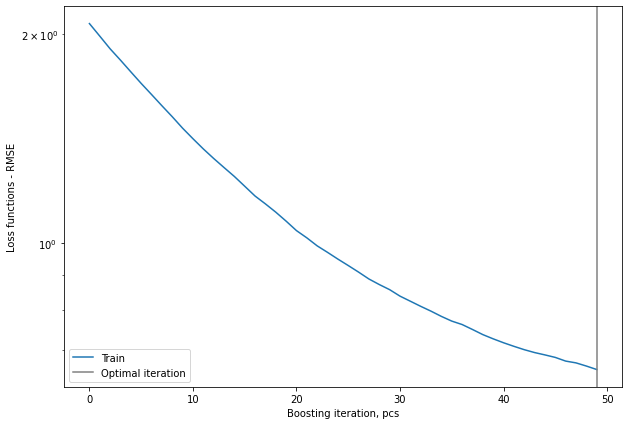

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.2
Relative bias(%):  -8.08
RMSE: 0.7
Relative RMSE(%):  0.267
MSE: 0.4
R square: 46.7%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 1.359
a1: 0.370
R^2: 0.604
Uncertainty
a0: 1.36+/-0.08
a1: 0.370+/-0.030


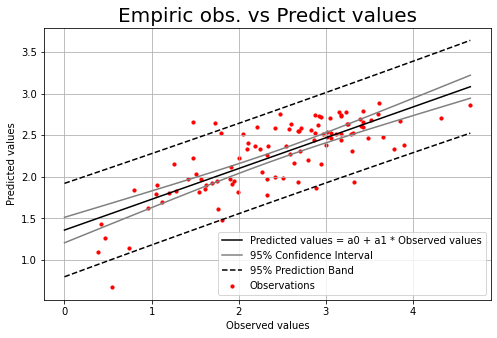

In [33]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(0, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

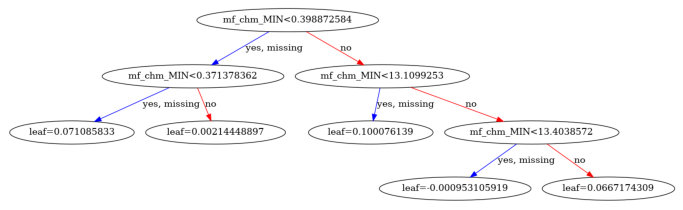

In [35]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

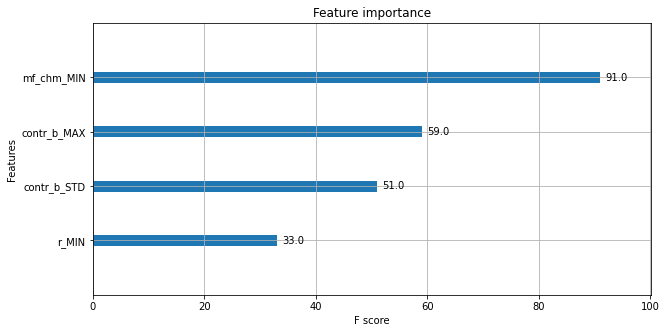

In [37]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

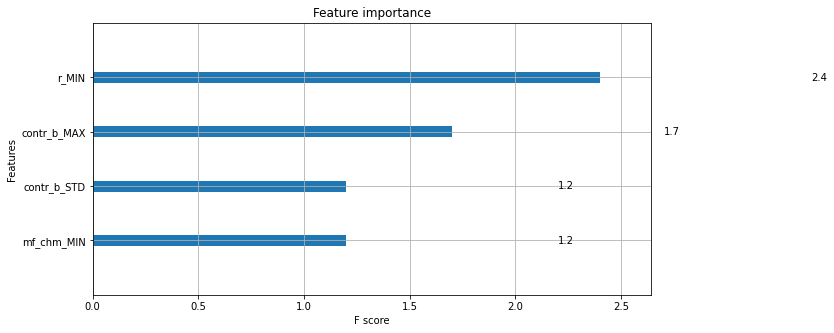

In [38]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

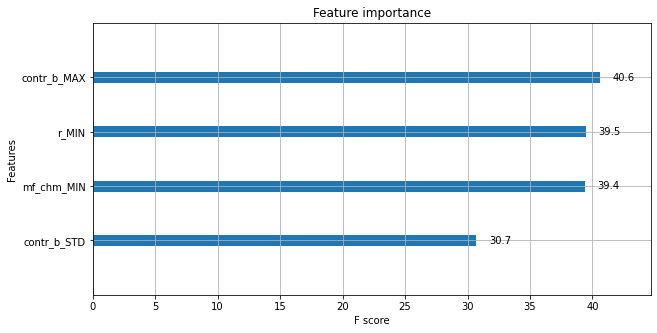

In [39]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [40]:
# Load SHAP`s library
import shap

In [41]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


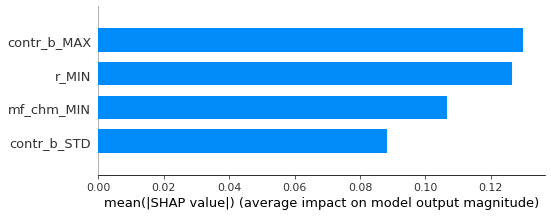

In [42]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

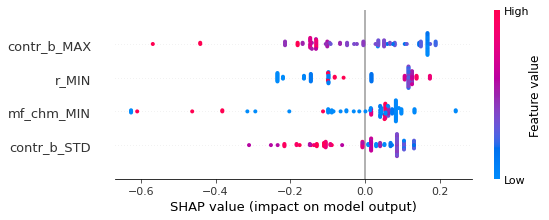

In [43]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

In [ ]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [ ]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_Tag_Sr_XGB_model_.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_Tag_St_XGB_model_.txt")